# Inteligencja obliczeniowa w analizie danych cyfrowych - Projekt 1
## Airfoil Self Noise, drzewa regresji, średni błąd bezwzględny
### Autorzy: Tomasz Ociepka, Szymon Lepianka

In [179]:
import seaborn as seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing

Wczytanie danych

In [180]:
df = pd.read_csv('data/airfoil_self_noise.dat', sep='\t', header=None,
     names=['frequency', 'angle-of-attack', 'chord-length', 'free-stream-velocity',
            'suction-side-displacement-thickness', 'sound-pressure-level'])
print(df.head())
print("Data shape", df.shape)

   frequency  angle-of-attack  chord-length  free-stream-velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   suction-side-displacement-thickness  sound-pressure-level  
0                             0.002663               126.201  
1                             0.002663               125.201  
2                             0.002663               125.951  
3                             0.002663               127.591  
4                             0.002663               127.461  
Data shape (1503, 6)


Typy danych:

In [181]:
print(df.dtypes)

frequency                                int64
angle-of-attack                        float64
chord-length                           float64
free-stream-velocity                   float64
suction-side-displacement-thickness    float64
sound-pressure-level                   float64
dtype: object


Atrybuty danych: <br>
Wejście:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

Wyjście:
1. Scaled sound pressure level, in decibels.

Sprawdzamy, czy wszystkie komórki są zapełnione.

In [182]:
df.isna().any()

frequency                              False
angle-of-attack                        False
chord-length                           False
free-stream-velocity                   False
suction-side-displacement-thickness    False
sound-pressure-level                   False
dtype: bool

- Brakujące dane: not applicable

Wizualizacja (korelacja):

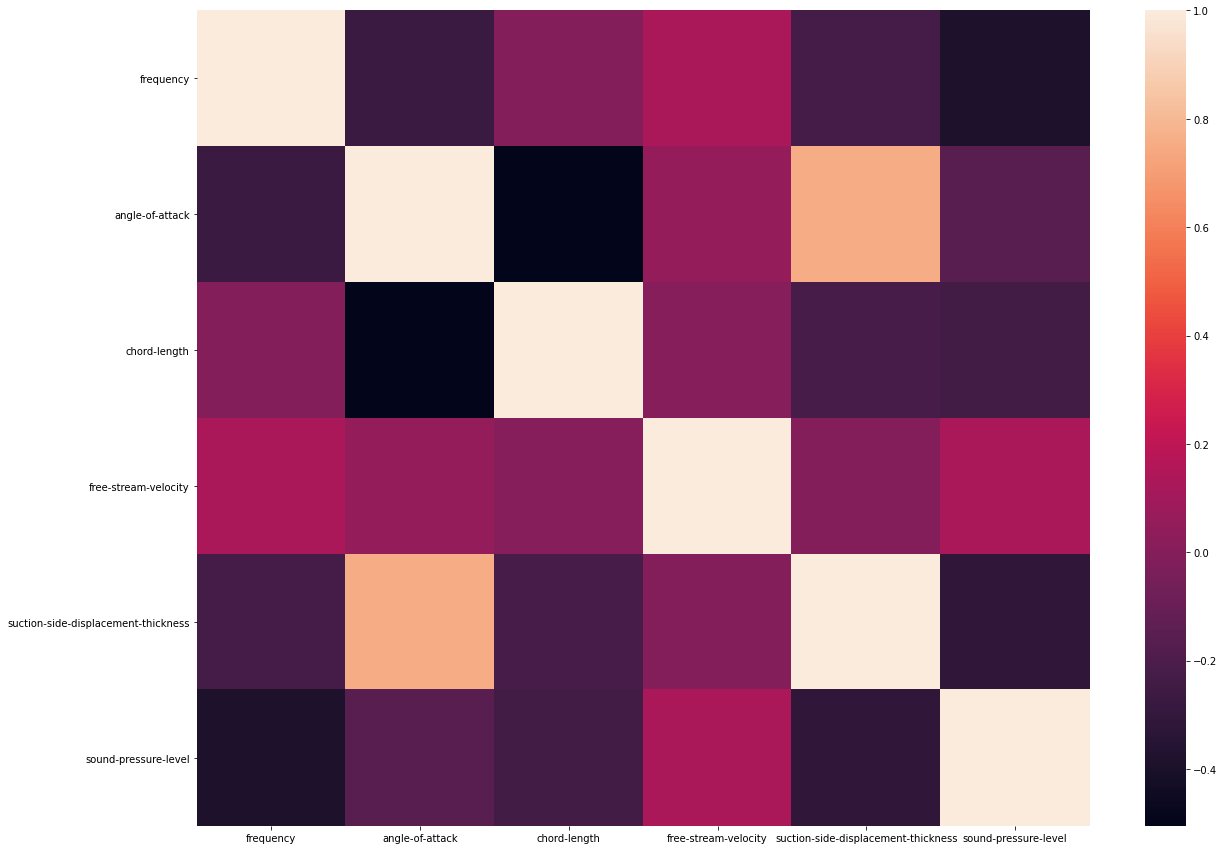

In [183]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
seaborn.heatmap(corr)
plt.show()

Podział danych:

In [184]:
X = df.iloc[:,0:5]
Y = df.iloc[:, 5]
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=421, shuffle=True)

X.shape: (1503, 5)
Y.shape: (1503,)


Bazowy model drzewa rergesyjnego (bez wyboru parametrów):

Score: 0.8876727751305266


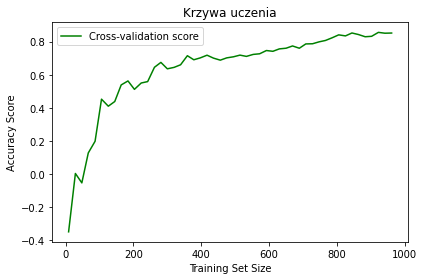

In [185]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
print(f"Score: {tree_reg.score(X_test, y_test)}")

def plot_learning_curve(model, X_train, y_train):
    sizes, training_scores, testing_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 50))

    mean_testing = np.mean(testing_scores, axis=1)
    np.std(testing_scores, axis=1)

    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    plt.title("Krzywa uczenia")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

plot_learning_curve(DecisionTreeRegressor(), X_train, y_train)

Walidacja za pomocą 10-krotnej walidacji krzyżowej:

In [186]:
def evaluate_reg(tree_reg, ret=False):
    maes = []
    kf = KFold(n_splits=10, shuffle=True) # 10-krotna walidacja krzyżowa

    for train_idx, valid_idx in kf.split(X_train, y_train):
        X_t_f, X_v_f = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_t_f, y_v_f = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        tree_reg.fit(X_t_f, y_t_f)
        pred_test = tree_reg.predict(X_test)
        mae = mean_absolute_error(y_test, pred_test)
        maes.append(mae)
        # print(f"MAE: {mae}")
        
    if ret:
        return np.array(maes).min()
    else:
        print(f"Mean of MAEs: {np.array(maes).mean()}")
        print(f"Min MAE: {np.array(maes).min()}")

print("Domyślne parametry:")
tree_reg = DecisionTreeRegressor()
evaluate_reg(tree_reg)

print("\nWybrane parametry (max_depth=6):")
tree_reg = DecisionTreeRegressor(max_depth=6, criterion='mae')
evaluate_reg(tree_reg)

print("\nWybrane parametry (max_leaf_nodes=100):")
tree_reg = DecisionTreeRegressor(max_leaf_nodes=100, criterion='mae')
evaluate_reg(tree_reg)

print("\nWybrane parametry (max_depth=40, max_leaf_nodes=2000):")
tree_reg = DecisionTreeRegressor(max_depth=40, max_leaf_nodes=2000, criterion='mae')
evaluate_reg(tree_reg)

print("\nWybrane parametry (max_depth=6, max_leaf_nodes=8):")
tree_reg = DecisionTreeRegressor(max_depth=30, max_leaf_nodes=1000, criterion='mae')
evaluate_reg(tree_reg)

print("\nWybrane parametry (min_samples_leaf=2, max_leaf_nodes=2048):")
tree_reg = DecisionTreeRegressor(min_samples_leaf=2, max_leaf_nodes=2048, criterion='mae')
evaluate_reg(tree_reg)

Domyślne parametry:
Mean of MAEs: 1.9958960132890369
Min MAE: 1.8849169435215947

Wybrane parametry (max_depth=6):
Mean of MAEs: 2.9403717607973427
Min MAE: 2.866071428571429

Wybrane parametry (max_leaf_nodes=100):
Mean of MAEs: 2.5889325581395353
Min MAE: 2.4559534883720944

Wybrane parametry (max_depth=40, max_leaf_nodes=2000):
Mean of MAEs: 1.9286681063122924
Min MAE: 1.826102990033223

Wybrane parametry (max_depth=6, max_leaf_nodes=8):
Mean of MAEs: 1.9732679401993352
Min MAE: 1.8863621262458474

Wybrane parametry (min_samples_leaf=2, max_leaf_nodes=2048):
Mean of MAEs: 2.1301204318936877
Min MAE: 2.046342192691029


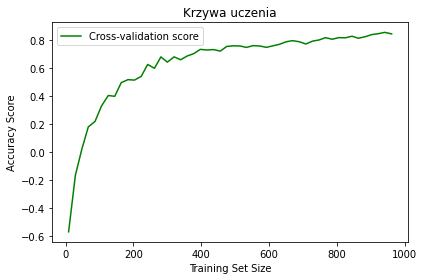

In [187]:
# Krzywa uczenia:
plot_learning_curve(DecisionTreeRegressor(criterion='mae'), X_train, y_train)

# Znajdowanie optymalnych hiperparametrów korzystając z walidacji krzyżowej
max_leaf_nodes <br>
min_samples_leaf

(array([9], dtype=int64), array([0], dtype=int64))
Mean of MAEs: 1.9648832225913622
Min MAE: 1.792799003322259
Najlepsze hiperparametry: 
max leaf nodes 1024
min samples leaf 1
Mean of MAEs: 1.9665111295681061
Min MAE: 1.781918604651163
Najlepszy wynik 0.8671678376109513


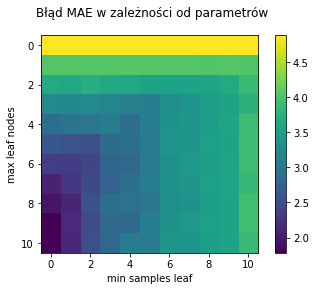

In [188]:
max_leaf_nodes_params = [2**i for i in range(1,12)]
min_samples_leaf_params = [i**2 for i in range(1,12)]

error_matrix = np.zeros((len(max_leaf_nodes_params), len(min_samples_leaf_params)))

for i,mln in enumerate(max_leaf_nodes_params):
    for j,msl in enumerate(min_samples_leaf_params):
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=mln, min_samples_leaf=msl, criterion='mae')
        # tree_reg.fit(X_train, y_train)
        # error_matrix[i,j] = mean_absolute_error(y_test, tree_reg.predict(X_test))
        error_matrix[i,j] = evaluate_reg(tree_reg, ret=True)

min_ix = np.where(error_matrix == error_matrix.min())
print(min_ix)

fig, ax= plt.subplots()
fig.suptitle("Błąd MAE w zależności od parametrów")
im = ax.imshow(error_matrix)
fig.colorbar(im, ax=ax)
ax.set(xlabel='min samples leaf', ylabel='max leaf nodes')
#ax.set_yticklabels([0,*max_leaf_nodes_params])
#ax.set_xticklabels([0,*min_samples_leaf_params])

best_mln = max_leaf_nodes_params[int(min_ix[0])]
best_msl = min_samples_leaf_params[int(min_ix[1])]

tree_reg = DecisionTreeRegressor(max_leaf_nodes=best_mln, min_samples_leaf=best_msl, criterion='mae')
tree_reg.fit(X_train,y_train)

evaluate_reg(tree_reg)

print("Najlepsze hiperparametry: ")
print("max leaf nodes", best_mln)
print("min samples leaf", best_msl)
evaluate_reg(tree_reg)
print("Najlepszy wynik", tree_reg.score(X_test, y_test))

plt.show()

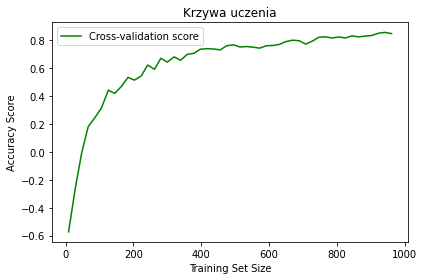

In [189]:
plot_learning_curve(DecisionTreeRegressor(max_leaf_nodes=best_mln, min_samples_leaf=best_msl, criterion='mae'),
                    X_train, y_train)


# Znajdowanie optymalnych hiperparametrów korzystając z walidacji krzyżowej
max_leaf_nodes <br>
max_depth

(array([1], dtype=int64), array([4], dtype=int64))
Najlepsze hiperparametry: 
max leaf nodes:  850
max depth:  17
Mean of MAEs: 1.9192827242524917
Min MAE: 1.788669435215947
Najlepszy wynik:  0.878575288392786


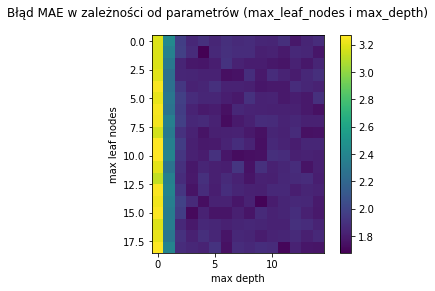

In [190]:
# max_leaf_nodes_params = [i**2 for i in range(12,35)]
max_leaf_nodes_params = [i for i in range(700,3500,150)]
# max_depth_params = [i**2 for i in range(2,15)]
max_depth_params = [i for i in range(5,50,3)]

error_matrix = np.zeros((len(max_leaf_nodes_params), len(max_depth_params)))

for i,mln in enumerate(max_leaf_nodes_params):
    for j,md in enumerate(max_depth_params):
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=mln, max_depth=md, criterion='mae')
        # tree_reg.fit(X_train, y_train)
        # error_matrix[i,j] = mean_absolute_error(y_test, tree_reg.predict(X_test))
        error_matrix[i,j] = evaluate_reg(tree_reg, ret=True)

min_ix = np.where(error_matrix == error_matrix.min())
print(min_ix)

fig, ax= plt.subplots()
fig.suptitle("Błąd MAE w zależności od parametrów (max_leaf_nodes i max_depth)")
im = ax.imshow(error_matrix)
fig.colorbar(im, ax=ax)
ax.set(xlabel='max depth', ylabel='max leaf nodes')
#ax.set_yticklabels([0,*max_leaf_nodes_params])
#ax.set_xticklabels([0,*min_samples_leaf_params])

best_mln = max_leaf_nodes_params[int(min_ix[0])]
best_md = max_depth_params[int(min_ix[1])]

tree_reg = DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae')
tree_reg.fit(X_train,y_train)

print("Najlepsze hiperparametry: ")
print("max leaf nodes: ", best_mln)
print("max depth: ", best_md)
evaluate_reg(tree_reg)
print("Najlepszy wynik: ", tree_reg.score(X_test, y_test))

plt.show()

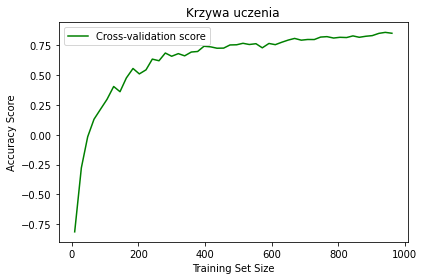

In [191]:
#Krzywa uczenia:
plot_learning_curve(DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae'),
                    X_train, y_train)

#### Zbadanie wpływu normalizacji, standaryzacji i PCA
(na cechach będących liczbami rzeczywistymi) na proces uczenia (dodanie ich jako trzeci optymalizowany
hiperparametr o pięciu wartościach: brak normalizacji czy standaryzacji, normalizacja,
standaryzacja, dwa warianty PCA z różnymi wyborami liczby głównych składowych)

###Normalizacja:
W przypadku rzeczywistych obliczeń należy dokonać normalizacji zmiennych
(dla wszystkich przypadków). Brak normalizacji, w przypadku zmiennych
o dużym rozrzucie zakresu wartości, spowoduje fałszywy wzrost znaczenia
składowych o dużych wartościach.

In [192]:
normalizer  = preprocessing.Normalizer()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.fit_transform(X_test)
X_normal_train = pd.DataFrame(X_normal_train)
X_normal_test = pd.DataFrame(X_normal_test)

Optymalizacja hiperparametrów dla znormalizowanych danych:

In [193]:
max_leaf_nodes_params = [i**2 for i in range(12,35)]
max_depth_params = [i**2 for i in range(3,15)]

error_matrix = np.zeros((len(max_leaf_nodes_params), len(max_depth_params)))

for i,mln in enumerate(max_leaf_nodes_params):
    for j,md in enumerate(max_depth_params):
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=mln, max_depth=md, criterion='mae')
        tree_reg.fit(X_normal_train, y_train)
        error_matrix[i,j] = mean_absolute_error(y_test, tree_reg.predict(X_normal_test))

min_ix = np.where(error_matrix == error_matrix.min())
print(min_ix)

best_mln = max_leaf_nodes_params[int(min_ix[0])]
best_md = max_depth_params[int(min_ix[1])]

tree_reg = DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae')
tree_reg.fit(X_normal_train,y_train)

print("Najlepsze hiperparametry: ")
print("max leaf nodes: ", best_mln)
print("max depth: ", best_md)
evaluate_reg(tree_reg)
print("Najlepszy wynik: ", tree_reg.score(X_normal_test, y_test))

plt.show()

(array([18], dtype=int64), array([10], dtype=int64))
Najlepsze hiperparametry: 
max leaf nodes:  900
max depth:  169
Mean of MAEs: 1.9505460132890362
Min MAE: 1.8910299003322253
Najlepszy wynik:  -1.209219458846762


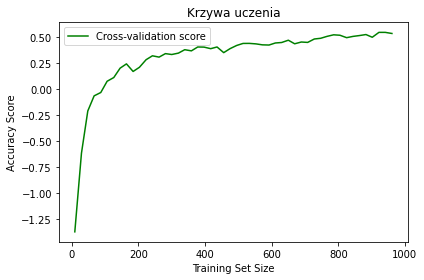

In [194]:
#Krzywa uczenia:
plot_learning_curve(DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae'),
                    X_normal_train, y_train)

###Standaryzacja:
Standaryzacja – rodzaj normalizacji zmiennej losowej, w wyniku której
zmienna uzyskuje średnią wartość oczekiwaną zero i odchylenie standardowe jeden.

In [195]:
standard_scaler  = preprocessing.StandardScaler()

X_std_train = standard_scaler.fit_transform(X_train)
X_std_test = standard_scaler.fit_transform(X_test)
X_std_train = pd.DataFrame(X_std_train)
X_std_test = pd.DataFrame(X_std_test)


Optymalizacja hiperparametrów dla ustandaryzowanych danych:

In [196]:
max_leaf_nodes_params = [i**2 for i in range(12,35)]
max_depth_params = [i**2 for i in range(2,15)]

error_matrix = np.zeros((len(max_leaf_nodes_params), len(max_depth_params)))

for i,mln in enumerate(max_leaf_nodes_params):
    for j,md in enumerate(max_depth_params):
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=mln, max_depth=md, criterion='mae')
        tree_reg.fit(X_std_train, y_train)
        error_matrix[i,j] = mean_absolute_error(y_test, tree_reg.predict(X_std_test))

min_ix = np.where(error_matrix == error_matrix.min())
print(min_ix)

best_mln = max_leaf_nodes_params[int(min_ix[0])]
best_md = max_depth_params[int(min_ix[1])]

tree_reg = DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae')
tree_reg.fit(X_std_train,y_train)

print("Najlepsze hiperparametry: ")
print("max leaf nodes: ", best_mln)
print("max depth: ", best_md)
evaluate_reg(tree_reg)
print("Najlepszy wynik: ", tree_reg.score(X_std_test, y_test))

(array([17], dtype=int64), array([2], dtype=int64))
Najlepsze hiperparametry: 
max leaf nodes:  841
max depth:  16
Mean of MAEs: 1.9657815614617937
Min MAE: 1.79728073089701
Najlepszy wynik:  -0.9018032706999812


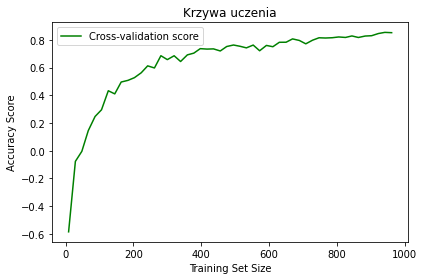

In [197]:
#Krzywa uczenia:
plot_learning_curve(DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae'),
                    X_std_train, y_train)

###PCA:
Analiza głównych składowych (Principal Component Analysis, PCA):
Jedna ze statystycznych metod analizy czynnikowej.
Celem PCA jest taki obrót układu współrzędnych, aby maksymalizować w pierwszej
kolejności wariancję pierwszej współrzędnej, następnie wariancję drugiej
współrzędnej itd.. W ten sposób konstruowana jest nowa przestrzeń obserwacji,
w której najwięcej zmienności wyjaśniają początkowe czynniki.

In [198]:
pca = PCA(n_components=5)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
X_pca_train = pd.DataFrame(X_pca_train)
X_pca_test = pd.DataFrame(X_pca_test)

Optymalizacja hiperparametrów dla PCA(n_components=5):

In [199]:
max_leaf_nodes_params = [i**2 for i in range(12,35)]
max_depth_params = [i**2 for i in range(4,15)]

error_matrix = np.zeros((len(max_leaf_nodes_params), len(max_depth_params)))

for i,mln in enumerate(max_leaf_nodes_params):
    for j,md in enumerate(max_depth_params):
        tree_reg = DecisionTreeRegressor(max_leaf_nodes=mln, max_depth=md, criterion='mae')
        tree_reg.fit(X_pca_train, y_train)
        error_matrix[i,j] = mean_absolute_error(y_test, tree_reg.predict(X_pca_test))

min_ix = np.where(error_matrix == error_matrix.min())
print(min_ix)
if len(min_ix[0]) == 1:
    best_mln = max_leaf_nodes_params[int(min_ix[0])]
    best_md = max_depth_params[int(min_ix[1])]
else:
    best_mln = max_leaf_nodes_params[int(min_ix[0][0])]
    best_md = max_depth_params[int(min_ix[1][0])]

tree_reg = DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae')
tree_reg.fit(X_pca_train,y_train)

print("Najlepsze hiperparametry: ")
print("max leaf nodes: ", best_mln)
print("max depth: ", best_md)
evaluate_reg(tree_reg)
print("Najlepszy wynik: ", tree_reg.score(X_pca_test, y_test))

(array([3], dtype=int64), array([0], dtype=int64))
Najlepsze hiperparametry: 
max leaf nodes:  225
max depth:  16
Mean of MAEs: 2.30146877076412
Min MAE: 2.21839534883721
Najlepszy wynik:  -1.5074713592240987


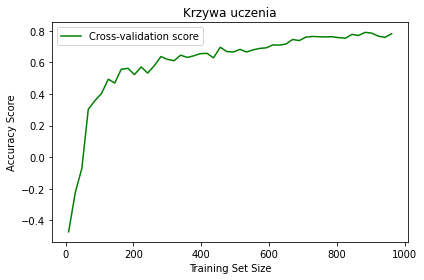

In [200]:
#Krzywa uczenia:
plot_learning_curve(DecisionTreeRegressor(max_leaf_nodes=best_mln, max_depth=best_md, criterion='mae'),
                    X_pca_train, y_train)